In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg_classifier = LogisticRegression()

param_grid = {
    'fit_intercept': [True, False],
    'multi_class': ['ovr', 'multinomial']
}

grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

best_logreg_model = grid_search.best_estimator_
y_pred = best_logreg_model.predict(X_test)

print("\n Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\n Precisión:", accuracy_score(y_test, y_pred))
print("\n Informe de clasificación:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Mejores hiperparámetros: {'fit_intercept': True, 'multi_class': 'multinomial'}

 Matriz de confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

 Precisión: 1.0

 Informe de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


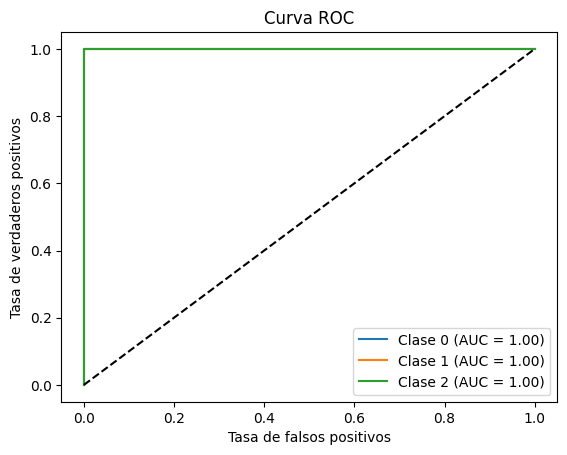

In [12]:
# Plot ROC curve
y_pred_proba = best_logreg_model.predict_proba(X_test)
for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {auc_value:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

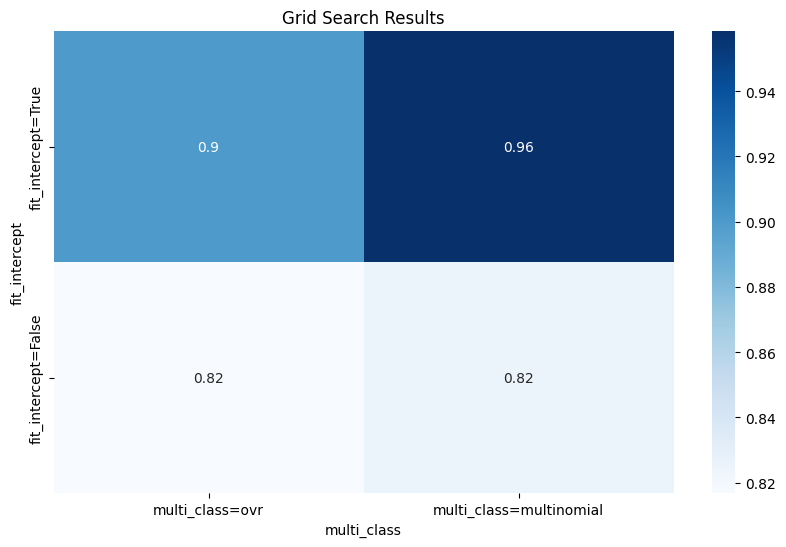

In [13]:
# Plot grid search results
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(results['mean_test_score'].reshape(2, 2), index=['fit_intercept=True', 'fit_intercept=False'], columns=['multi_class=ovr', 'multi_class=multinomial']), annot=True, cmap='Blues')
plt.xlabel('multi_class')
plt.ylabel('fit_intercept')
plt.title('Grid Search Results')
plt.show()